In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Acquire Data with yfinance

## Data import

In [2]:
#Stocks
ticker_list = pd.read_csv('./stock_list/stock_all_20230510.csv')['ticker'].tolist()
print(f'Number of stocks:', len(ticker_list))
ticker_list = [ticker + '.JK' for ticker in ticker_list]
#Period
period = '1y'

Number of stocks: 869


In [3]:
import yfinance as yf
df = pd.DataFrame()
for ticker in ticker_list:
    stock = yf.Ticker(ticker)
    print(stock)
    stock_df = stock.history(period=period)
    stock_df['Ticker'] = ticker
    df = pd.concat([df, stock_df])
print(df.info())
print('Number of ticker data acquired: ', len(df['Ticker'].unique()))

yfinance.Ticker object <AALI.JK>
yfinance.Ticker object <ABBA.JK>
yfinance.Ticker object <ABDA.JK>
yfinance.Ticker object <ABMM.JK>
yfinance.Ticker object <ACES.JK>
yfinance.Ticker object <ACST.JK>
yfinance.Ticker object <ADCP.JK>
yfinance.Ticker object <ADES.JK>
yfinance.Ticker object <ADFO.JK>
ADFO.JK: No data found, symbol may be delisted
yfinance.Ticker object <ADHI.JK>
yfinance.Ticker object <ADMF.JK>
yfinance.Ticker object <ADMG.JK>
yfinance.Ticker object <ADMR.JK>
yfinance.Ticker object <ADRO.JK>
yfinance.Ticker object <AGAR.JK>
yfinance.Ticker object <AGII.JK>
yfinance.Ticker object <AGRO.JK>
yfinance.Ticker object <AGRS.JK>
yfinance.Ticker object <AHAP.JK>
yfinance.Ticker object <AIMS.JK>
yfinance.Ticker object <AISA.JK>
yfinance.Ticker object <AKKU.JK>
yfinance.Ticker object <AKPI.JK>
yfinance.Ticker object <AKRA.JK>
yfinance.Ticker object <AKSI.JK>
yfinance.Ticker object <ALDO.JK>
yfinance.Ticker object <ALKA.JK>
yfinance.Ticker object <ALMI.JK>
yfinance.Ticker object <ALTO.

In [4]:
df.index = pd.to_datetime(df.index, utc=True)
df.index

DatetimeIndex(['2022-05-18 17:00:00+00:00', '2022-05-19 17:00:00+00:00',
               '2022-05-22 17:00:00+00:00', '2022-05-23 17:00:00+00:00',
               '2022-05-24 17:00:00+00:00', '2022-05-26 17:00:00+00:00',
               '2022-05-29 17:00:00+00:00', '2022-05-30 17:00:00+00:00',
               '2022-06-01 17:00:00+00:00', '2022-06-02 17:00:00+00:00',
               ...
               '2023-05-04 17:00:00+00:00', '2023-05-07 17:00:00+00:00',
               '2023-05-08 17:00:00+00:00', '2023-05-09 17:00:00+00:00',
               '2023-05-10 17:00:00+00:00', '2023-05-11 17:00:00+00:00',
               '2023-05-14 17:00:00+00:00', '2023-05-15 17:00:00+00:00',
               '2023-05-16 17:00:00+00:00', '2023-05-18 17:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=201451, freq=None)

## Add 'change' and 'range'

In [5]:
#change = close - open
df['change'] = df['Close']-df['Open']

#range = high - low
df['range'] = df['High']-df['Low']
df[['Ticker', 'change', 'range']]

,Ticker,change,range
Date,,,
2022-05-18 17:00:00+00:00,AALI.JK,237.783743,523.124236
2022-05-19 17:00:00+00:00,AALI.JK,499.345837,642.016076
2022-05-22 17:00:00+00:00,AALI.JK,-784.686335,808.464709
2022-05-23 17:00:00+00:00,AALI.JK,-71.335122,404.232360
2022-05-24 17:00:00+00:00,AALI.JK,-237.783752,475.567505
...,...,...,...
2023-05-11 17:00:00+00:00,ZYRX.JK,-12.000000,12.000000
2023-05-14 17:00:00+00:00,ZYRX.JK,8.000000,12.000000
2023-05-15 17:00:00+00:00,ZYRX.JK,0.000000,10.000000


# Parameters for Technical Analysis

In [6]:
# Input MA Cross Window
window_short_cross = 9
window_long_cross = 26

# Input EMA Window
window_ema = 20

# Input MACD Window
window_short_macd = 12
window_long_macd = 26
window_sign_macd = 9

# MA Cross Calculation

In [7]:
import ta
def get_sma_cross(df, window_short, window_long):
    tickers = df['Ticker'].unique()
    sma_cross_df = pd.DataFrame()
    for ticker in tickers:
        ticker_df = df[df['Ticker'] == ticker]
        sma_short = ta.trend.sma_indicator(close=ticker_df['Close'], window=window_short, fillna=True)
        sma_long = ta.trend.sma_indicator(close=ticker_df['Close'], window=window_long, fillna=True)
        print(ticker, ' SMA Cross Calculated')
        sma_cross_df[ticker] = sma_short - sma_long
    return sma_cross_df

In [8]:
sma_cross_df = get_sma_cross(df, window_short_cross, window_long_cross)
print(sma_cross_df.tail(1))

AALI.JK  SMA Cross Calculated
ABBA.JK  SMA Cross Calculated
ABDA.JK  SMA Cross Calculated
ABMM.JK  SMA Cross Calculated
ACES.JK  SMA Cross Calculated
ACST.JK  SMA Cross Calculated
ADCP.JK  SMA Cross Calculated
ADES.JK  SMA Cross Calculated
ADHI.JK  SMA Cross Calculated
ADMF.JK  SMA Cross Calculated
ADMG.JK  SMA Cross Calculated
ADMR.JK  SMA Cross Calculated
ADRO.JK  SMA Cross Calculated
AGAR.JK  SMA Cross Calculated
AGII.JK  SMA Cross Calculated
AGRO.JK  SMA Cross Calculated
AGRS.JK  SMA Cross Calculated
AHAP.JK  SMA Cross Calculated
AIMS.JK  SMA Cross Calculated
AISA.JK  SMA Cross Calculated
AKKU.JK  SMA Cross Calculated
AKPI.JK  SMA Cross Calculated
AKRA.JK  SMA Cross Calculated
AKSI.JK  SMA Cross Calculated
ALDO.JK  SMA Cross Calculated
ALKA.JK  SMA Cross Calculated
ALMI.JK  SMA Cross Calculated
ALTO.JK  SMA Cross Calculated
AMAG.JK  SMA Cross Calculated
AMAN.JK  SMA Cross Calculated
AMAR.JK  SMA Cross Calculated
AMFG.JK  SMA Cross Calculated
AMIN.JK  SMA Cross Calculated
AMMS.JK  S

# EMA Calculation

In [9]:
import ta
def get_ema(df, window):
    tickers = df['Ticker'].unique()
    ema_df = pd.DataFrame()
    for ticker in tickers:
        ticker_df = df[df['Ticker'] == ticker]
        ema = ta.trend.EMAIndicator(close=ticker_df['Close'], window=window, fillna=True).ema_indicator()
        print(ticker, ' EMA Calculated')
        ema_df[ticker] = ema
    return ema_df

In [10]:
ema_df = get_ema(df, window_ema)
print(ema_df.tail())

AALI.JK  EMA Calculated
ABBA.JK  EMA Calculated
ABDA.JK  EMA Calculated
ABMM.JK  EMA Calculated
ACES.JK  EMA Calculated
ACST.JK  EMA Calculated
ADCP.JK  EMA Calculated
ADES.JK  EMA Calculated
ADHI.JK  EMA Calculated
ADMF.JK  EMA Calculated
ADMG.JK  EMA Calculated
ADMR.JK  EMA Calculated
ADRO.JK  EMA Calculated
AGAR.JK  EMA Calculated
AGII.JK  EMA Calculated
AGRO.JK  EMA Calculated
AGRS.JK  EMA Calculated
AHAP.JK  EMA Calculated
AIMS.JK  EMA Calculated
AISA.JK  EMA Calculated
AKKU.JK  EMA Calculated
AKPI.JK  EMA Calculated
AKRA.JK  EMA Calculated
AKSI.JK  EMA Calculated
ALDO.JK  EMA Calculated
ALKA.JK  EMA Calculated
ALMI.JK  EMA Calculated
ALTO.JK  EMA Calculated
AMAG.JK  EMA Calculated
AMAN.JK  EMA Calculated
AMAR.JK  EMA Calculated
AMFG.JK  EMA Calculated
AMIN.JK  EMA Calculated
AMMS.JK  EMA Calculated
AMOR.JK  EMA Calculated
AMRT.JK  EMA Calculated
ANDI.JK  EMA Calculated
ANJT.JK  EMA Calculated
ANTM.JK  EMA Calculated
APEX.JK  EMA Calculated
APIC.JK  EMA Calculated
APII.JK  EMA Cal

# MACD Calculation

In [11]:
def get_macd(df, window_short, window_long, window_sign):
    tickers = df['Ticker'].unique()
    macd_df = pd.DataFrame()
    for ticker in tickers:
        ticker_df = df[df['Ticker'] == ticker]
        macd = ta.trend.MACD(ticker_df['Close'], window_slow=window_long, window_fast=window_short, window_sign=window_sign).macd()
        macd_signal = ta.trend.MACD(ticker_df['Close'], window_slow=window_long, window_fast=window_short, window_sign=window_sign).macd_signal()
        macd_diff = ta.trend.MACD(ticker_df['Close'], window_slow=window_long, window_fast=window_short, window_sign=window_sign).macd_diff()
        print(ticker, ' MACD Calculated')
        macd_df[f'{ticker}_MACD_Line'] = macd
        macd_df[f'{ticker}_MACD_Signal'] = macd_signal
        macd_df[f'{ticker}_MACD_Diff'] = macd_diff
    return macd_df

In [12]:
macd_df = get_macd(df, window_short_macd, window_long_macd, window_sign_macd)
macd_df.tail(1)

AALI.JK  MACD Calculated
ABBA.JK  MACD Calculated
ABDA.JK  MACD Calculated
ABMM.JK  MACD Calculated
ACES.JK  MACD Calculated
ACST.JK  MACD Calculated
ADCP.JK  MACD Calculated
ADES.JK  MACD Calculated
ADHI.JK  MACD Calculated
ADMF.JK  MACD Calculated
ADMG.JK  MACD Calculated
ADMR.JK  MACD Calculated
ADRO.JK  MACD Calculated
AGAR.JK  MACD Calculated
AGII.JK  MACD Calculated
AGRO.JK  MACD Calculated
AGRS.JK  MACD Calculated
AHAP.JK  MACD Calculated
AIMS.JK  MACD Calculated
AISA.JK  MACD Calculated
AKKU.JK  MACD Calculated
AKPI.JK  MACD Calculated
AKRA.JK  MACD Calculated
AKSI.JK  MACD Calculated
ALDO.JK  MACD Calculated
ALKA.JK  MACD Calculated
ALMI.JK  MACD Calculated
ALTO.JK  MACD Calculated
AMAG.JK  MACD Calculated
AMAN.JK  MACD Calculated
AMAR.JK  MACD Calculated
AMFG.JK  MACD Calculated
AMIN.JK  MACD Calculated
AMMS.JK  MACD Calculated
AMOR.JK  MACD Calculated
AMRT.JK  MACD Calculated
ANDI.JK  MACD Calculated
ANJT.JK  MACD Calculated
ANTM.JK  MACD Calculated
APEX.JK  MACD Calculated


,AALI.JK_MACD_Line,AALI.JK_MACD_Signal,AALI.JK_MACD_Diff,ABBA.JK_MACD_Line,ABBA.JK_MACD_Signal,ABBA.JK_MACD_Diff,ABDA.JK_MACD_Line,ABDA.JK_MACD_Signal,ABDA.JK_MACD_Diff,ABMM.JK_MACD_Line,...,ZBRA.JK_MACD_Diff,ZINC.JK_MACD_Line,ZINC.JK_MACD_Signal,ZINC.JK_MACD_Diff,ZONE.JK_MACD_Line,ZONE.JK_MACD_Signal,ZONE.JK_MACD_Diff,ZYRX.JK_MACD_Line,ZYRX.JK_MACD_Signal,ZYRX.JK_MACD_Diff
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-18 17:00:00+00:00,-90.241146,-64.977572,-25.263574,-2.936159,-2.474853,-0.461306,NaN,NaN,NaN,89.671476,...,-0.117917,-0.000663,-0.000974,0.000312,-19.569286,-16.877172,-2.692114,-1.895346,-1.876702,-0.018644


In [13]:
# Set MACD Difference limit for indexing
macd_diff_low = -1.5
macd_diff_high = 1.5

# Get the last row of MACD DataFrame
last_row = macd_df.iloc[-1]

# Create a boolean mask for MACD Diff between macd_diff_low and macd_diff_high
tickers = df['Ticker'].unique()
mask = (last_row[[f'{ticker}_MACD_Diff' for ticker in tickers]] >= macd_diff_low) & (last_row[[f'{ticker}_MACD_Diff' for ticker in tickers]] <= macd_diff_high)

# Get the tickers and their corresponding MACD Diff values that satisfy the boolean mask
filtered_tickers_macd = last_row[[f'{ticker}_MACD_Diff' for ticker in tickers]][mask]

print(filtered_tickers_macd)

ABBA.JK_MACD_Diff   -0.461306
ACST.JK_MACD_Diff    0.032334
ADCP.JK_MACD_Diff   -0.039945
ADMG.JK_MACD_Diff    0.864200
AGII.JK_MACD_Diff    0.889216
                       ...   
YPAS.JK_MACD_Diff    0.521388
ZATA.JK_MACD_Diff   -0.169025
ZBRA.JK_MACD_Diff   -0.117917
ZINC.JK_MACD_Diff    0.000312
ZYRX.JK_MACD_Diff   -0.018644
Name: 2023-05-18 17:00:00+00:00, Length: 424, dtype: float64


# RSI Calculation

In [14]:
import ta
def get_rsi(df):
    tickers = df['Ticker'].unique()
    rsi_df = pd.DataFrame()
    for ticker in tickers:
        ticker_df = df[df['Ticker'] == ticker]
        rsi = ta.momentum.RSIIndicator(ticker_df['Close']).rsi()
        print(ticker, ' RSI Calculated')
        rsi_df[ticker] = rsi
    return rsi_df

In [15]:
rsi_df = get_rsi(df)
print(rsi_df.info())

AALI.JK  RSI Calculated
ABBA.JK  RSI Calculated
ABDA.JK  RSI Calculated
ABMM.JK  RSI Calculated
ACES.JK  RSI Calculated
ACST.JK  RSI Calculated
ADCP.JK  RSI Calculated
ADES.JK  RSI Calculated
ADHI.JK  RSI Calculated
ADMF.JK  RSI Calculated
ADMG.JK  RSI Calculated
ADMR.JK  RSI Calculated
ADRO.JK  RSI Calculated
AGAR.JK  RSI Calculated
AGII.JK  RSI Calculated
AGRO.JK  RSI Calculated
AGRS.JK  RSI Calculated
AHAP.JK  RSI Calculated
AIMS.JK  RSI Calculated
AISA.JK  RSI Calculated
AKKU.JK  RSI Calculated
AKPI.JK  RSI Calculated
AKRA.JK  RSI Calculated
AKSI.JK  RSI Calculated
ALDO.JK  RSI Calculated
ALKA.JK  RSI Calculated
ALMI.JK  RSI Calculated
ALTO.JK  RSI Calculated
AMAG.JK  RSI Calculated
AMAN.JK  RSI Calculated
AMAR.JK  RSI Calculated
AMFG.JK  RSI Calculated
AMIN.JK  RSI Calculated
AMMS.JK  RSI Calculated
AMOR.JK  RSI Calculated
AMRT.JK  RSI Calculated
ANDI.JK  RSI Calculated
ANJT.JK  RSI Calculated
ANTM.JK  RSI Calculated
APEX.JK  RSI Calculated
APIC.JK  RSI Calculated
APII.JK  RSI Cal

# Compilation of last close price and last technicals

Final dataframe 'last_df' containing last_close, last_ema, last_rsi, last_macd_diff, & delta_close_ema

In [16]:
last_close = df.groupby('Ticker').last()['Close']
last_ema = ema_df.tail(1).T.squeeze()
last_sma_cross = sma_cross_df.tail(1).T.squeeze()
last_rsi = rsi_df.tail(1).reset_index().drop('Date', axis=1).T.squeeze()
last_macd_diff = macd_df.tail(1).filter(regex='_MACD_Diff$').T.squeeze()
last_macd_diff.index = df['Ticker'].unique()

last_df = pd.DataFrame([last_close, last_sma_cross,  last_ema, last_rsi, last_macd_diff])
last_df.index = ['last_close', 'last_sma_cross', 'last_ema', 'last_rsi', 'last_macd_diff']
last_df = last_df.transpose()

# Add close / EMA ratio, SMA Cross / close ratio, and MACD Diff / close ratio
last_df['last_ema_ratio'] = last_df['last_close'] / last_df['last_ema']
last_df['last_sma_cross_ratio'] = last_df['last_sma_cross'] / last_df['last_close']
last_df['last_macd_diff_ratio'] = last_df['last_macd_diff'] / last_df['last_close'] 

last_df.head()

,last_close,last_sma_cross,last_ema,last_rsi,last_macd_diff,last_ema_ratio,last_sma_cross_ratio,last_macd_diff_ratio
AALI.JK,7400.0,-155.850246,7613.773929,33.419083,-25.263574,0.971923,-0.021061,-0.003414
ABBA.JK,97.0,-3.777778,103.353963,34.777686,-0.461306,0.938522,-0.038946,-0.004756
ABDA.JK,6450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABMM.JK,3360.0,120.811966,3393.003518,50.853143,-32.608276,0.990273,0.035956,-0.009705
ACES.JK,585.0,68.611111,518.818370,74.363638,12.302711,1.127562,0.117284,0.021030


Add index information on 'last_df'

In [17]:
lq45 = pd.read_csv('./stock_list/lq45.csv')['Ticker'].tolist()
lq45 = [ticker + '.JK' for ticker in lq45]

idx30 = pd.read_csv('./stock_list/idx30.csv')['Ticker'].tolist()
idx30 = [ticker + '.JK' for ticker in idx30]

idx80 = pd.read_csv('./stock_list/idx80.csv')['Ticker'].tolist()
idx80 = [ticker + '.JK' for ticker in idx80]

bisnis27 = pd.read_csv('./stock_list/bisnis27.csv')['Ticker'].tolist()
bisnis27 = [ticker + '.JK' for ticker in bisnis27]

mnc36 = pd.read_csv('./stock_list/mnc36.csv')['Ticker'].tolist()
mnc36 = [ticker + '.JK' for ticker in mnc36]

pefindo25 = pd.read_csv('./stock_list/pefindo25.csv')['Ticker'].tolist()
pefindo25 = [ticker + '.JK' for ticker in pefindo25]

kompas100 = pd.read_csv('./stock_list/kompas100.csv')['Ticker'].tolist()
kompas100 = [ticker + '.JK' for ticker in kompas100]

print('Index list imported')

Index list imported


In [18]:
last_df['kompas100'] = last_df.index.isin(kompas100)
last_df['lq45'] = last_df.index.isin(lq45)
last_df['idx30'] = last_df.index.isin(idx30)
last_df['idx80'] = last_df.index.isin(idx80)
last_df['bisnis27'] = last_df.index.isin(bisnis27)
last_df['mnc36'] = last_df.index.isin(mnc36)
last_df['pefindo25'] = last_df.index.isin(pefindo25)
last_df.head()

,last_close,last_sma_cross,last_ema,last_rsi,last_macd_diff,last_ema_ratio,last_sma_cross_ratio,last_macd_diff_ratio,kompas100,lq45,idx30,idx80,bisnis27,mnc36,pefindo25
AALI.JK,7400.0,-155.850246,7613.773929,33.419083,-25.263574,0.971923,-0.021061,-0.003414,True,False,False,True,False,False,False
ABBA.JK,97.0,-3.777778,103.353963,34.777686,-0.461306,0.938522,-0.038946,-0.004756,False,False,False,False,False,False,False
ABDA.JK,6450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False
ABMM.JK,3360.0,120.811966,3393.003518,50.853143,-32.608276,0.990273,0.035956,-0.009705,True,False,False,False,False,False,False
ACES.JK,585.0,68.611111,518.818370,74.363638,12.302711,1.127562,0.117284,0.021030,True,True,False,True,False,False,False


# Recommended Stocks (Technical Criteria)

In [19]:
#Mask 0: Index-related filter
mask0 = last_df['kompas100'] == True

#Mask 1: SMA Cross related filter --> SMA cross ratio between x1 and x2
mask1 = last_df['last_sma_cross_ratio'].between(0,0.02)

#Mask 2: EMA-related filter
mask2 = last_df['last_ema_ratio'].between(1, 1.1)

#Mask 3: MACD-related filter --> MACD difference ratio between x1 and x2
mask3 = last_df['last_macd_diff_ratio'].between(0,1)

#Mask 4: RSI-related filter --> RSI below x
mask4 = last_df['last_rsi'] < 60

rec_df = last_df[mask0][mask1][mask2][mask3][mask4]
print('Number of recommended stocks: ', len(rec_df), '\n')
rec_df.sort_values('last_rsi')

Number of recommended stocks:  1 



,last_close,last_sma_cross,last_ema,last_rsi,last_macd_diff,last_ema_ratio,last_sma_cross_ratio,last_macd_diff_ratio,kompas100,lq45,idx30,idx80,bisnis27,mnc36,pefindo25
SMGR.JK,6000.0,93.034134,5901.458074,53.010299,40.972734,1.016698,0.015506,0.006829,True,True,True,True,True,False,False


# Pivot Points

In [20]:
# Calculate Pivot Points
def calculate_pivot_points(df):
    # Calculate Pivot Point (PP)
    df['PP'] = (df['High'] + df['Low'] + df['Close']) / 3

    # Calculate Support and Resistance Levels
    df['S1'] = (2 * df['PP']) - df['High']
    df['S2'] = df['PP'] - (df['High'] - df['Low'])
    df['S3'] = df['Low'] - 2 * (df['High'] - df['PP'])

    df['R1'] = (2 * df['PP']) - df['Low']
    df['R2'] = df['PP'] + (df['High'] - df['Low'])
    df['R3'] = df['High'] + 2 * (df['PP'] - df['Low'])

    return df[['Ticker','Open', 'High', 'Low', 'Close', 'Volume', 'PP', 'S1', 'S2', 'S3', 'R1', 'R2', 'R3']]

In [21]:
pivot_points = calculate_pivot_points(df)
last_pivot_points = pivot_points.groupby('Ticker').last()

In [22]:
last_pivot_points.loc[rec_df.index]

,Open,High,Low,Close,Volume,PP,S1,S2,S3,R1,R2,R3
SMGR.JK,5925.0,6025.0,5875.0,6000.0,8474900.0,5966.666667,5908.333333,5816.666667,5758.333333,6058.333333,6116.666667,6208.333333


# Logistic Regression Classification Model

Using coefficients and intercepts from stock_list_classification_technical.py

In [23]:
chosen_ticker_list = last_df.index.tolist()

In [24]:
# Check feature parameters
current_feature_parameters = {
    'window_short_cross': window_short_cross,
    'window_long_cross': window_long_cross,
    'window_ema': window_ema,
    'window_short_macd': window_short_macd,
    'window_long_macd': window_long_macd,
    'window_sign_macd': window_sign_macd
}
current_feature_parameters = pd.DataFrame.from_dict(current_feature_parameters, orient='index', columns=['Value'])
model_feature_parameters = pd.read_csv('./lr_model/feature_parameters.csv', index_col=0)

# Prepare dataframe
lr_df = pd.DataFrame(columns = ['Ticker', 'Accuracy', 'increase_proba'])

# Apply model to predict probabilities if feature parameters match
if current_feature_parameters.equals(model_feature_parameters) == True:
    print('Feature parameters match!', '\n')
    lr = pd.read_csv('./lr_model/lr_model.csv').set_index('Ticker')
    for chosen_ticker in chosen_ticker_list:
        # Check if chosen ticker model is available
        if chosen_ticker in lr.index:
            # Show model accuracy
            #print(chosen_ticker, ' model accuracy:', lr.loc[chosen_ticker]['Accuracy'])

            # Extract coef and intercept
            import re
            string = lr[lr.index == chosen_ticker]['coef'][0]
            coef = [float(x) for x in string.strip('[]').split()]
            intercept = lr[lr.index == chosen_ticker]['intercept'][0]

            # Feature generation
            feature = [ema_df[chosen_ticker].pct_change().tail(1).values[0],
                       sma_cross_df[chosen_ticker].pct_change().tail(1).values[0],
                   macd_df[chosen_ticker + '_MACD_Line'].pct_change().tail(1).values[0],
                   macd_df[chosen_ticker + '_MACD_Signal'].pct_change().tail(1).values[0],
                   macd_df[chosen_ticker + '_MACD_Diff'].pct_change().tail(1).values[0],
                   rsi_df[chosen_ticker].pct_change().tail(1).values[0]]
            
            # define sigmoid function
            import numpy as np
            def sigmoid(z):
                return 1 / (1 + np.exp(-z))

            # compute linear combination of features and coefficients, add intercept
            z = np.dot(feature, coef) + intercept

            # apply sigmoid function to get predicted probability of target class being positive
            y_pred_proba = sigmoid(z)

            # apply threshold to predicted probabilities to get predicted class labels (0 or 1)
            threshold = 0.5  # you can adjust this threshold depending on your needs
            y_pred = (y_pred_proba >= threshold).astype(int)
            #print(f'{chosen_ticker} price increase probability: ', y_pred_proba, '\n')

            # append to dataframe
            lr_df = lr_df.append({'Ticker':chosen_ticker, 'Accuracy':lr.loc[chosen_ticker]['Accuracy'], 'increase_proba':y_pred_proba}, ignore_index = True)
        else:
            print(f'{chosen_ticker} model is not available.')
else:
    print('Model parameters do not match')
lr_df = lr_df.set_index('Ticker')

Feature parameters match! 

ARTI.JK model is not available.
BAPI.JK model is not available.
BLTA.JK model is not available.
BSWD.JK model is not available.
BTEL.JK model is not available.
CNKO.JK model is not available.
ELTY.JK model is not available.
GOLL.JK model is not available.
HADE.JK model is not available.
JGLE.JK model is not available.
KBRI.JK model is not available.
LAPD.JK model is not available.
MAGP.JK model is not available.
MDRN.JK model is not available.
MIRA.JK model is not available.
MTFN.JK model is not available.
PLAS.JK model is not available.
SAGE.JK model is not available.
SCPI.JK model is not available.
TAXI.JK model is not available.


In [25]:
lr_df['kompas100'] = lr_df.index.isin(kompas100)
lr_df['lq45'] = lr_df.index.isin(lq45)
lr_df['idx30'] = lr_df.index.isin(idx30)
lr_df['idx80'] = lr_df.index.isin(idx80)
lr_df['bisnis27'] = lr_df.index.isin(bisnis27)
lr_df['mnc36'] = lr_df.index.isin(mnc36)
lr_df['pefindo25'] = lr_df.index.isin(pefindo25)
lr_df.head()

,Accuracy,increase_proba,kompas100,lq45,idx30,idx80,bisnis27,mnc36,pefindo25
Ticker,,,,,,,,,
AALI.JK,0.622407,0.439782,True,False,False,True,False,False,False
ABBA.JK,0.675799,0.293842,False,False,False,False,False,False,False
ABDA.JK,0.913978,0.097659,False,False,False,False,False,False,False
ABMM.JK,0.564315,0.265811,True,False,False,False,False,False,False
ACES.JK,0.605809,0.426748,True,True,False,True,False,False,False


# Recommended Stocks (Classification Model)

In [26]:
#Mask 0: Index-related filter
mask0 = lr_df['kompas100'] == True

#Mask 1: Model accuracy filter
mask1 = lr_df['Accuracy'].between(0.5,0.9)

#Mask 2: Price increase probability filter
mask2 = lr_df['increase_proba'] > 0.5

print('Number of recommended stocks: ', len(lr_df[mask0][mask1][mask2]), '\n')
lr_df[mask0][mask1][mask2]

Number of recommended stocks:  0 



,Accuracy,increase_proba,kompas100,lq45,idx30,idx80,bisnis27,mnc36,pefindo25
Ticker,,,,,,,,,


# Additional
For customized analysis

In [28]:
last_pivot_points.loc['SMGR.JK']

Open      5.925000e+03
High      6.025000e+03
Low       5.875000e+03
Close     6.000000e+03
Volume    8.474900e+06
PP        5.966667e+03
S1        5.908333e+03
S2        5.816667e+03
S3        5.758333e+03
R1        6.058333e+03
R2        6.116667e+03
R3        6.208333e+03
Name: SMGR.JK, dtype: float64

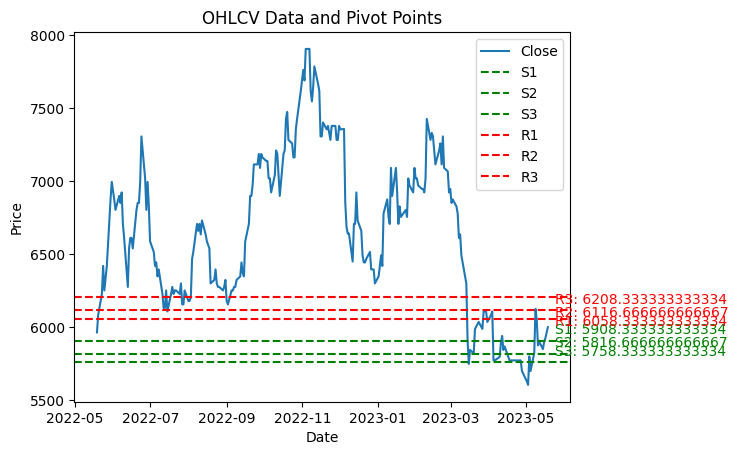

In [46]:
import matplotlib.pyplot as plt
sr_ticker = 'SMGR.JK'

# Create the line plot for 'Close' column
plt.plot(df[df['Ticker'] == sr_ticker]['Close'], label='Close')

# Add horizontal lines for support levels
s1 = last_pivot_points.loc[sr_ticker, 'S1']
s2 = last_pivot_points.loc[sr_ticker, 'S2']
s3 = last_pivot_points.loc[sr_ticker, 'S3']
plt.axhline(y=s1, color='green', linestyle='--', label='S1')
plt.axhline(y=s2, color='green', linestyle='--', label='S2')
plt.axhline(y=s3, color='green', linestyle='--', label='S3')

# Add horizontal lines for resistance levels
r1 = last_pivot_points.loc[sr_ticker, 'R1']
r2 = last_pivot_points.loc[sr_ticker, 'R2']
r3 = last_pivot_points.loc[sr_ticker, 'R3']
plt.axhline(y=r1, color='red', linestyle='--', label='R1')
plt.axhline(y=r2, color='red', linestyle='--', label='R2')
plt.axhline(y=r3, color='red', linestyle='--', label='R3')

# Set the title and labels
plt.title('OHLCV Data and Pivot Points')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the legend
plt.legend()

# Define the data points for the text annotations
x_values = df[df['Ticker'] == sr_ticker].index
x_coord = x_values[-1]

# Display the S and R values as data labels
plt.annotate(f'S1: {s1}', (x_coord, s1), xytext=(5, 5), textcoords='offset points', color='green')
plt.annotate(f'S2: {s2}', (x_coord, s2), xytext=(5, 5), textcoords='offset points', color='green')
plt.annotate(f'S3: {s3}', (x_coord, s3), xytext=(5, 5), textcoords='offset points', color='green')
plt.annotate(f'R1: {r1}', (x_coord, r1), xytext=(5, -5), textcoords='offset points', color='red')
plt.annotate(f'R2: {r2}', (x_coord, r2), xytext=(5, -5), textcoords='offset points', color='red')
plt.annotate(f'R3: {r3}', (x_coord, r3), xytext=(5, -5), textcoords='offset points', color='red')

# Show the plot
plt.show()

In [40]:
x_coord

247